<a href="https://colab.research.google.com/github/Bella2322/ccRCC-histological-feature-detection/blob/main/Renal_carcinoma_MultiLabelClassification04_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Classification**

In [ ]:
import pandas as pd
import numpy as np

# LoaD multiple CSV

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
all_files = [\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K520/K520 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K379/K379 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K376/K376 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K256/K256 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K250/K250 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K180/K180 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K139/K139 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K124/K124 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K118/K118 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K110/K110 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K107/K107 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K105/K105 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K097/K097 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K096/K096 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K070/K070 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K066/K066 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K059/K059 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K065/K065 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K021/K021 H&E annotations.tsv\",\"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/K027/K027 H&E annotations.tsv\"]\n",
        "\n",
        "df = pd.concat((pd.read_csv(f,sep='\\t') for f in tsv_files), ignore_index=True)"

In [ ]:
df

,Image,Name,Class,Parent,ROI,Centroid X µm,Centroid Y µm,Num Detections,Num Non-Tumour cell,Num Tumour cell,Area µm^2,Perimeter µm
0,K520_PR001,Tissue_area,Tissue_area,Image,Geometry,2449.2,2815.3,1020.0,373.0,647.0,18939432.3,21103.1
1,K520_PR001,Fibrosis,Fibrosis,Tissue_area,Geometry,2498.3,2860.1,0.0,0.0,0.0,3638539.2,23960.3
2,K520_PR001,tumour_immune,tumour_immune,Image,Geometry,2437.5,2804.6,1020.0,373.0,647.0,15300893.1,36518.8
3,K520_PR001,Compact small nests,Compact small nests,Image,Geometry,2649.1,3420.6,1020.0,373.0,647.0,10877756.7,27080.2
4,K520_PR001,ISUP 2,ISUP 2,Image,Geometry,2437.5,2804.6,1020.0,373.0,647.0,15300893.1,36518.8
...,...,...,...,...,...,...,...,...,...,...,...,...
3094,K027_PR005,Insular,Insular,Image,Geometry,10757.4,7584.6,NaN,NaN,NaN,127100272.1,127259.9
3095,K027_PR005,ISUP 2,ISUP 2,Image,Geometry,10757.4,7584.6,NaN,NaN,NaN,127100272.1,127259.9
3096,K027_PR005,Clear cells,Clear cells,Image,Geometry,10757.4,7584.6,NaN,NaN,NaN,127100272.1,127259.9
3097,K027_PR005,Cystic,Cystic,Clear cells,Geometry,14770.5,7824.7,NaN,NaN,NaN,27977274.7,40884.1


In [ ]:
unique_classes=np.unique(df['Name'])
unique_classes=list(unique_classes)
unique_classes.insert(0,'Image')
unique_classes

['Image',
 'Alveolar',
 'Blood vessels',
 'Chromophobe-like',
 'Clear cells',
 'Compact small nests',
 'Cystic',
 'Eosinophlic',
 'Fibrosis',
 'Friable',
 'HLRCC like',
 'ISUP 1',
 'ISUP 2',
 'ISUP 3',
 'ISUP 4',
 'Immune infiltration',
 'Infiltrative',
 'Insular',
 'Large nests',
 'Lymphovascular Invasion',
 'Necrosis',
 'Non-Tumour cell',
 'Non-tumour tissue',
 'Normal kidney',
 'Normal tissue',
 'Papillary',
 'PathAnnotationObject',
 'Regressive',
 'Rhabdoid',
 'Sarcomatoid',
 'Solid sheets',
 'Syncytial giant cell',
 'TILS high',
 'TILS low',
 'TILS moderate',
 'Tertiary Lymphoid Structure',
 'Tissue_area',
 'Translocation-like',
 'Tubular',
 'Tumour cell',
 'Unassigned_architecture',
 'artefact',
 'compact small nests',
 'grade_unassigned',
 'granular cytoplasm',
 'haemorrhage',
 'no_tissue',
 'normal_immune',
 'peri-tumoural_immune',
 'sclerotic nested pattern',
 'spindled',
 'tertiary lymphoid structure',
 'tissue_area',
 'tumour_immune']

In [ ]:
dataset=df['Image']
dataset.columns=unique_classes
dataset=pd.DataFrame(dataset,columns=unique_classes)

dataset = dataset.drop_duplicates(subset=['Image'])
dataset=dataset.fillna(0)
dataset

,Image,Alveolar,Blood vessels,Chromophobe-like,Clear cells,Compact small nests,Cystic,Eosinophlic,Fibrosis,Friable,...,granular cytoplasm,haemorrhage,no_tissue,normal_immune,peri-tumoural_immune,sclerotic nested pattern,spindled,tertiary lymphoid structure,tissue_area,tumour_immune
0,K520_PR001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16,K520_PR002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,K520_PR003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,K520_PR004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
46,K520_PR005,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3058,K027_PR001,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3066,K027_PR002,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3075,K027_PR003,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3082,K027_PR004,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
for i in range(len(df)):
  image=df['Image'][i]
  name=df['Name'][i]
  #dataset[df['Image']][name]=1
  dataset[name].loc[dataset['Image']==image]=1
  #print( dataset[dataset['Image']==image][name])
#dataset=dataset.reset_index()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
dataset=dataset.reset_index()
dataset

,index,Image,Alveolar,Blood vessels,Chromophobe-like,Clear cells,Compact small nests,Cystic,Eosinophlic,Fibrosis,...,granular cytoplasm,haemorrhage,no_tissue,normal_immune,peri-tumoural_immune,sclerotic nested pattern,spindled,tertiary lymphoid structure,tissue_area,tumour_immune
0,0,K520_PR001,0,0,0,1,1,0,0,1,...,0,0,0,0,1,1,0,0,0,1
1,16,K520_PR002,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,30,K520_PR003,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,37,K520_PR004,0,0,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,1,1
4,46,K520_PR005,0,0,0,1,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,3058,K027_PR001,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
351,3066,K027_PR002,1,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
352,3075,K027_PR003,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
353,3082,K027_PR004,1,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
from keras.applications.resnet import ResNet50,ResNet152
from keras.applications.vgg19 import VGG19

import os
import itertools
import sys
import xml.etree.ElementTree as ET
from collections import Counter
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from keras import backend as K
from keras.callbacks import Callback
from keras.layers import Dense
from keras.models import Model
from PIL import Image
from sklearn.metrics import (f1_score,
                             precision_score,
                             recall_score)

In [ ]:

def make_model():
    base_model = VGG19(
        include_top=False,
        weights='imagenet',
        input_shape=None,
        pooling='avg'
    )
    
    for layer in base_model.layers[10:]:
        layer.trainable = False

    predictions = Dense(len(unique_classes)-1, activation='sigmoid')(base_model.output)
    model = Model(inputs=base_model.input, outputs=predictions)
    model.compile(
        loss='binary_crossentropy',
        optimizer='adam',
        metrics=[ 'accuracy']
    )
    return model

model = make_model()
model.summary()

80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                              

In [ ]:
import imageio as iio
from skimage.transform import resize


In [ ]:
def load_data(dataset,base_dir):
    X_train=[]
    y_train=[]
    for i in range(len(dataset)):

      img_dir=base_dir+dataset['Image'][i]+'.jpg'
      try:
        img=iio.imread(img_dir)
      except:
        continue
      img=resize(img, (224, 224), mode='constant')
      print(img_dir)
      X_train.append(img)
      y_train.append(dataset.iloc[i,2:])
    return np.array(X_train),np.array(y_train)
x,y=load_data(dataset,"/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/")

/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR001.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR002.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR003.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR004.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR005.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR006.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR007.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR008.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR009.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR010.jpg
/content/drive/MyDrive/Upwork_Projects/Renal_Carcinoma2/Multilabel_Dataset/K520_PR011.jpg
/content/d

In [ ]:
x = np.asarray(x).astype(np.float32)
y = np.asarray(y).astype(np.float32)
len(x)

287

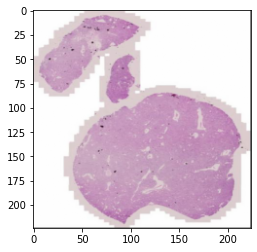

In [ ]:
plt.imshow(x[19])

In [ ]:
model.fit(x,y,epochs=100)

Epoch 1/100
9/9 [==============================] - 4s 439ms/step - loss: 0.1331 - accuracy: 0.0105
Epoch 2/100
9/9 [==============================] - 4s 447ms/step - loss: 0.1344 - accuracy: 0.0105
Epoch 3/100
9/9 [==============================] - 4s 451ms/step - loss: 0.1271 - accuracy: 0.0070
Epoch 4/100
9/9 [==============================] - 4s 458ms/step - loss: 0.1272 - accuracy: 0.0209
Epoch 5/100
9/9 [==============================] - 4s 466ms/step - loss: 0.1270 - accuracy: 0.0105
Epoch 6/100
9/9 [==============================] - 4s 473ms/step - loss: 0.1237 - accuracy: 0.0105
Epoch 7/100
9/9 [==============================] - 4s 476ms/step - loss: 0.1199 - accuracy: 0.0174
Epoch 8/100
9/9 [==============================] - 4s 477ms/step - loss: 0.1196 - accuracy: 0.0105
Epoch 9/100
9/9 [==============================] - 4s 466ms/step - loss: 0.1208 - accuracy: 0.0174
Epoch 10/100
9/9 [==============================] - 4s 458ms/step - loss: 0.1185 - accuracy: 0.0105
Epoch 11/

In [ ]:
pred=model.predict(x)
pred=(pred>=0.5).astype(np.int32)
pred=pd.DataFrame(pred)
pred

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
4,0,0,0,1,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
283,1,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
284,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
285,1,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
unique_classes

['Image',
 'Alveolar',
 'Blood vessels',
 'Chromophobe-like',
 'Clear cells',
 'Compact small nests',
 'Cystic',
 'Eosinophlic',
 'Fibrosis',
 'Friable',
 'HLRCC like',
 'ISUP 1',
 'ISUP 2',
 'ISUP 3',
 'ISUP 4',
 'Immune infiltration',
 'Infiltrative',
 'Insular',
 'Large nests',
 'Lymphovascular Invasion',
 'Necrosis',
 'Non-Tumour cell',
 'Non-tumour tissue',
 'Normal kidney',
 'Normal tissue',
 'Papillary',
 'PathAnnotationObject',
 'Regressive',
 'Rhabdoid',
 'Sarcomatoid',
 'Solid sheets',
 'Syncytial giant cell',
 'TILS high',
 'TILS low',
 'TILS moderate',
 'Tertiary Lymphoid Structure',
 'Tissue_area',
 'Translocation-like',
 'Tubular',
 'Tumour cell',
 'Unassigned_architecture',
 'artefact',
 'compact small nests',
 'grade_unassigned',
 'granular cytoplasm',
 'haemorrhage',
 'no_tissue',
 'normal_immune',
 'peri-tumoural_immune',
 'sclerotic nested pattern',
 'spindled',
 'tertiary lymphoid structure',
 'tissue_area',
 'tumour_immune']

In [ ]:
import sklearn.metrics as skm
import seaborn as sns

cm = skm.multilabel_confusion_matrix(y, pred)



In [ ]:
def draw_confusion_matrix(class_id,name):

  ax = sns.heatmap(cm[class_id], annot=True, cmap='Blues',fmt = 'g')

  ax.set_title('Seaborn Confusion Matrix  for '+str(name)+"\n");
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['False','True'])
  ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
  plt.show()

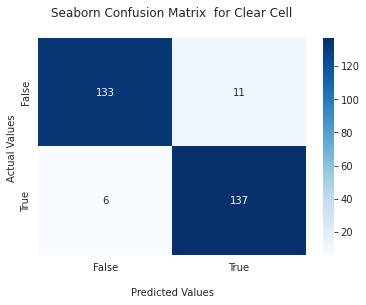

In [ ]:
draw_confusion_matrix(3,"Clear Cell")

In [ ]:
from sklearn.metrics import classification_report
pred=model.predict(x)
pred=(pred>=0.5).astype(np.int32)

y_data=y[:,3]
pred_data=pred[:,3]
print(classification_report(y_data, pred_data))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       144
         1.0       0.93      0.96      0.94       143

    accuracy                           0.94       287
   macro avg       0.94      0.94      0.94       287
weighted avg       0.94      0.94      0.94       287



In [ ]:
!pip install plot-metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


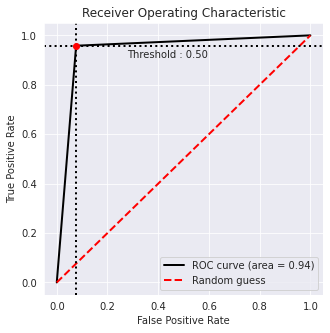

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_data, pred_data, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

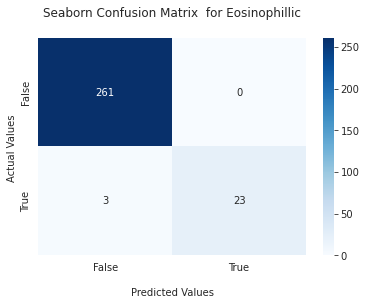

In [ ]:
draw_confusion_matrix(6,"Eosinophillic")

In [ ]:

y_data=y[:,6]
pred_data=pred[:,6]
print(classification_report(y_data, pred_data))

              precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       261
         1.0       1.00      0.88      0.94        26

    accuracy                           0.99       287
   macro avg       0.99      0.94      0.97       287
weighted avg       0.99      0.99      0.99       287



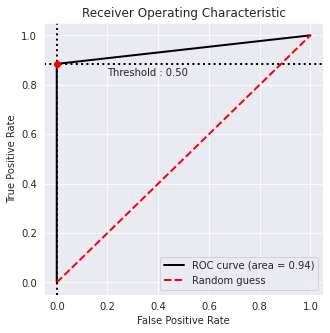

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_data, pred_data, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

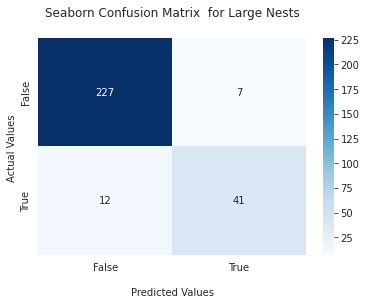

In [ ]:
draw_confusion_matrix(17,"Large Nests")

In [ ]:

y_data=y[:,17]
pred_data=pred[:,17]
print(classification_report(y_data, pred_data))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       234
         1.0       0.85      0.77      0.81        53

    accuracy                           0.93       287
   macro avg       0.90      0.87      0.89       287
weighted avg       0.93      0.93      0.93       287



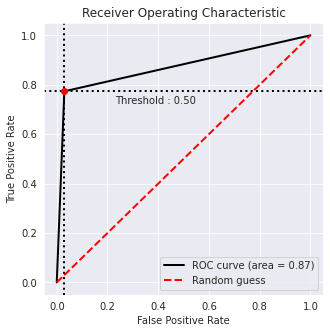

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_data, pred_data, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

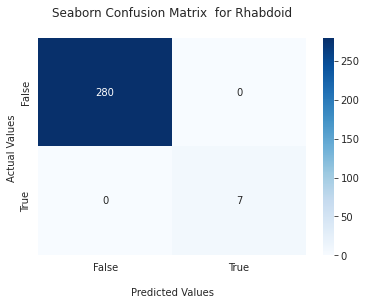

In [ ]:
draw_confusion_matrix(27,"Rhabdoid")

In [ ]:

y_data=y[:,27]
pred_data=pred[:,27]
print(classification_report(y_data, pred_data))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       280
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287



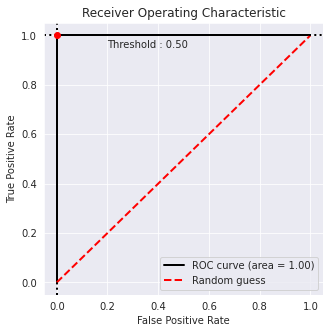

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_data, pred_data, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

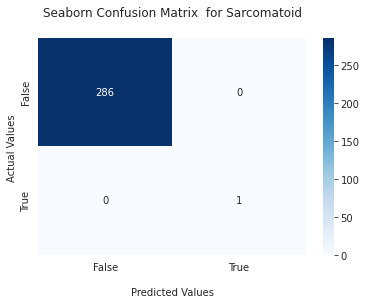

In [ ]:
draw_confusion_matrix(28,"Sarcomatoid")

In [ ]:

y_data=y[:,28]
pred_data=pred[:,28]
print(classification_report(y_data, pred_data))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       286
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287



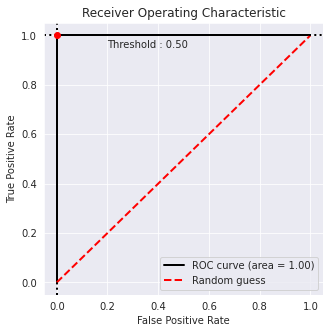

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_data, pred_data, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()

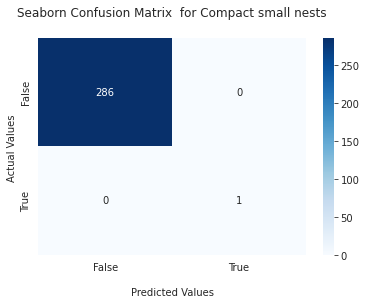

In [ ]:
draw_confusion_matrix(42,"Compact small nests")

In [ ]:

y_data=y[:,42]
pred_data=pred[:,42]
print(classification_report(y_data, pred_data))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       286
         1.0       1.00      1.00      1.00         1

    accuracy                           1.00       287
   macro avg       1.00      1.00      1.00       287
weighted avg       1.00      1.00      1.00       287



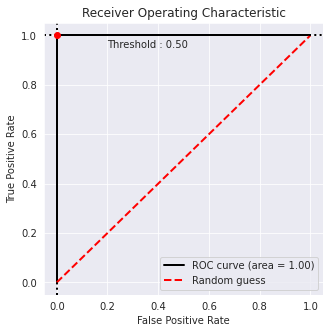

In [ ]:
from plot_metric.functions import BinaryClassification
# Visualisation with plot_metric
bc = BinaryClassification(y_data, pred_data, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(5,5))
bc.plot_roc_curve()
plt.show()